<a href="https://colab.research.google.com/github/CarlosPuenteL/Python-ML/blob/main/Regresion%20logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This part sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'
import pandas as pd


###
# REPLACE <addFilePath> BELOW WITH 'Data/football data.txt' (INCLUDING THE QUOTES) TO LOAD THE DATA FROM THAT FILE
###
dataset = pd.read_csv('football data.txt', index_col = False, sep = '\t', header = 0)
###

###
# REPLACE <printDataHere> BELOW WITH print(dataset.head()) TO PREVIEW OUR DATASET
###
dataset.head()
###

,average_goals_per_match,won_competition
0,2.422870,1
1,2.824478,1
2,0.571688,0
3,1.055028,0
4,0.394192,0


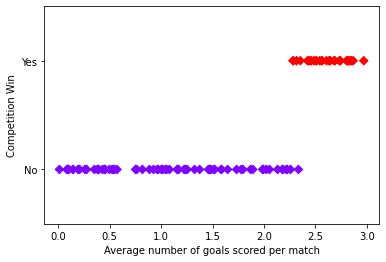

In [2]:
###
# REPLACE <addWonCompetition> BELOW WITH 'won_competition' (INCLUDING THE QUOTES)
###
train_Y = dataset['won_competition']
###

###
# REPLACE <addAverageGoals> BELOW WITH 'average_goals_per_match' (INCLUDING THE QUOTES)
###
train_X = dataset['average_goals_per_match']
###

# The 'won_competition' will be displayed on the vertical axis (y axis)
# The 'average_goals_per_match' will be displayed on the horizontal axis (x axis)

graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')

graph.yticks([0, 1], ['No', 'Yes'])
graph.ylabel("Competition Win")
graph.ylim([-0.5, 1.5])
graph.xlabel("Average number of goals scored per match")

graph.show()

In [3]:
import numpy as np
from sklearn import linear_model

# Here we build a logistic regression model

###
# REPLACE <buildLinearRegression> BELOW WITH linear_model.LogisticRegression() TO BUILD A LOGISTIC REGRESSION MODEL
###
clf = linear_model.LogisticRegression()
###

# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_X[:, np.newaxis], train_Y)

# This works out the loss
def sigmoid(train_X):
    return 1 / (1 + np.exp(-train_X))
X_test = np.linspace(0, 3, 300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

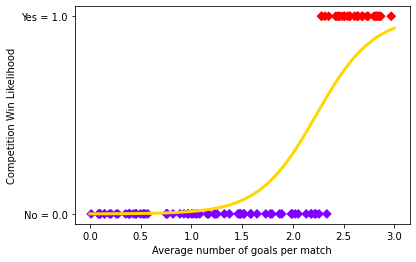

In [4]:
# This makes the graph
# The data points
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
# The curve
graph.plot(X_test, loss, color = 'gold', linewidth = 3)
# Define the y-axis
graph.yticks([0, 1], ['No = 0.0', 'Yes = 1.0'])
graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

Probability of winning this year
30.606829875507678%


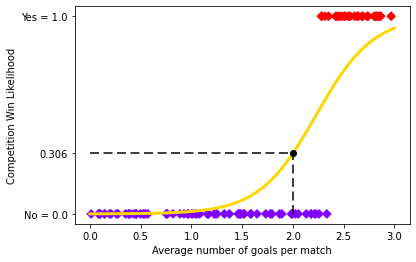

In [5]:
###
# REPLACE <numberOfGoals> BELOW WITH THE NUMBER OF GOALS IN A MATCH THIS YEAR. USE ANY NUMBER FROM 0 TO 3
###
p = 2
###

# Next we're going to use our model again - clf is the name of our model.
# We'll use a method to predict the probability of a positive result
# Use the variable p which we just made in this method.

###
# REPLACE <replaceWithP> BELOW WITH p TO PREDICT USING THIS VALUE
###
probOfWinning = clf.predict_proba([[ p ]])[0][1]
###

# This prints out the result
print("Probability of winning this year")
print(str(probOfWinning * 100) + "%")

# This plots the result
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning,3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') # result point
graph.plot(np.linspace(0, p, 2), np.full([2],probOfWinning), dashes = [6, 3], color = 'black') # dashed lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2), dashes = [6, 3], color = 'black') # dashed lines (to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

Probability of winning this year
0.32555622131245654%


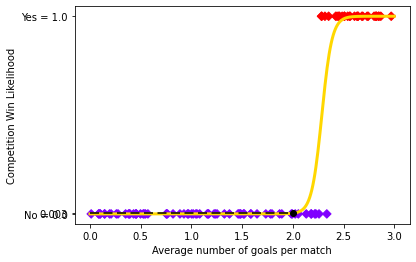

In [7]:
# Let's do that again.
# We will repeat what we did in step 3, but change the decision boundary.

import numpy as np
from sklearn import linear_model

###
# REPLACE THE <numberOfGoals> WITH THE NUMBER OF GOALS YOU WANT TO EVALUATE
###
p = 2
###

# Here we build the new logistic regression model.
# The C=200 is where we change the decision boundary.
###
# REPLACE <buildLinearRegression> BELOW WITH linear_model.LogisticRegression(C=200) TO BUILD A LOGISTIC REGRESSION MODEL
###
clf = linear_model.LogisticRegression(C=200)
###

# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_X[:, np.newaxis], train_Y)

# This works out the loss
def sigmoid(train_X):
    return 1 / (1 + np.exp(-train_X))
X_test = np.linspace(0, 3, 300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

# This makes the prediction for your chosen number of goals.
probOfWinning = clf.predict_proba([[p]])[0][1]

# This prints out the result.
print("Probability of winning this year")
print(str(probOfWinning * 100) + "%")

# This plots the result.
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning,3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') # result point
graph.plot(np.linspace(0, p, 2), np.full([2],probOfWinning), dashes = [6, 3], color = 'black') # dashed lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2), dashes = [6, 3], color = 'black') # dashed lines (to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()